In [1]:
%matplotlib inline
from setup import *
from analysis.util_plot import *

/gdrive/public/USERS/lkini/thesis/ec2/anaconda2/envs/echobase/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/gdrive/public/USERS/lkini/thesis/ec2/anaconda2/envs/echobase/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/gdrive/public/USERS/lkini/thesis/ec2/anaconda2/envs/echobase/lib/python2.7/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.Line

<h1>Generate feature matrix csv </h1>

In [2]:
width = -1
for fconn in ['broadband_CC','alphatheta','beta','lowgamma','highgamma']:
    skip_chop = True
    skip_mayo = False
    skip_hup = False

    dilate_radius = 0
    all_cres = gather_cres_results(dilate_radius,fconn)
    all_cres = get_norm(all_cres,width=width)
    width = len(map(lambda x: x.values(), all_cres.values())[0][0])
    pt_iter = 0

    patient_idx = all_cres.keys()
    
    out_txt = 'pt_id,' #First column
    index_col = []    
    ft_matrix = []

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_cres[patient_id]:
                continue
            index_col.append(patient_id)
            row_data = np.array((pt_iter+1,))    
            for pid,clips in sorted(all_cres.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                if fconn == 'broadband_CC': # print only once
                    print patient_id
                outcome = data['PATIENTS'][patient_id]['Outcome']
                avg_data = np.array(())
                for clip_id, clip in sorted(clips.items(), key=lambda x:x[0]):
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(clip,(clip.shape[0],1))))
                    except Exception:                
                        avg_data = np.reshape(clip,(clip.shape[0],1))

                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.hstack((row_data,avg_data)) 

                # Update header
                if(pt_iter == 0):
                    for t in range(1,clip.shape[0]+1):
                        out_txt += 'cres_'+str(t)+'_%s,'%fconn
            if(get_outcome(outcome) == 'Good'):        
                row_data = np.hstack((row_data,[0]))        
            else:
                row_data = np.hstack((row_data,[1]))
            ft_matrix.append(row_data)
            pt_iter += 1

    out_txt += 'Outcome'
    ft_matrix = np.array(ft_matrix)
    df = pd.DataFrame(data=ft_matrix, index=index_col,columns=out_txt.split(',') )

    comp_dir = os.path.expanduser(data['COMP_DIR'])
    df.to_csv('%s/../code/data/e01B_%s.csv'%(comp_dir,fconn))

HUP064
HUP065
HUP068
HUP073
HUP074
HUP075
HUP078
HUP080
HUP082
HUP083
HUP086
HUP087
HUP088
HUP094
HUP105
HUP106
HUP107
HUP111A
HUP111B
HUP116
Study012
Study016
Study017
Study019
Study020
Study022
Study028
Study029


<h1> Figure 6B. Control Centrality of Resection Zone in Time-Varying Functional Networks (across patients) </h1>

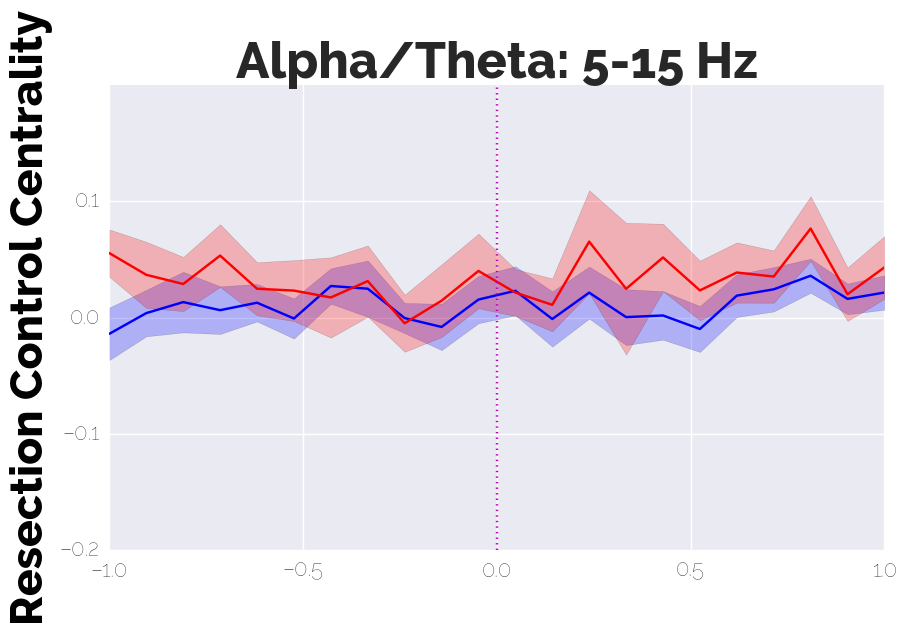

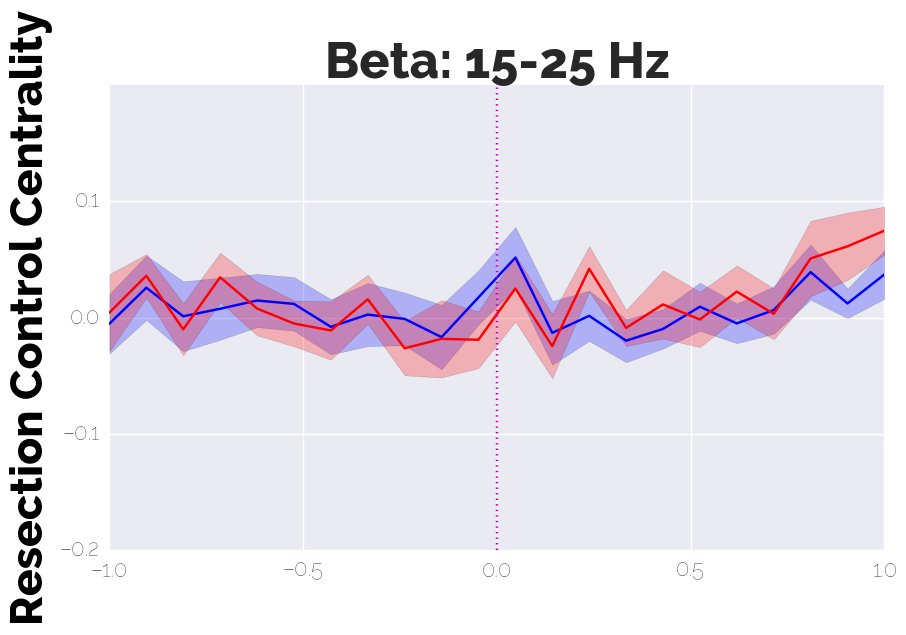

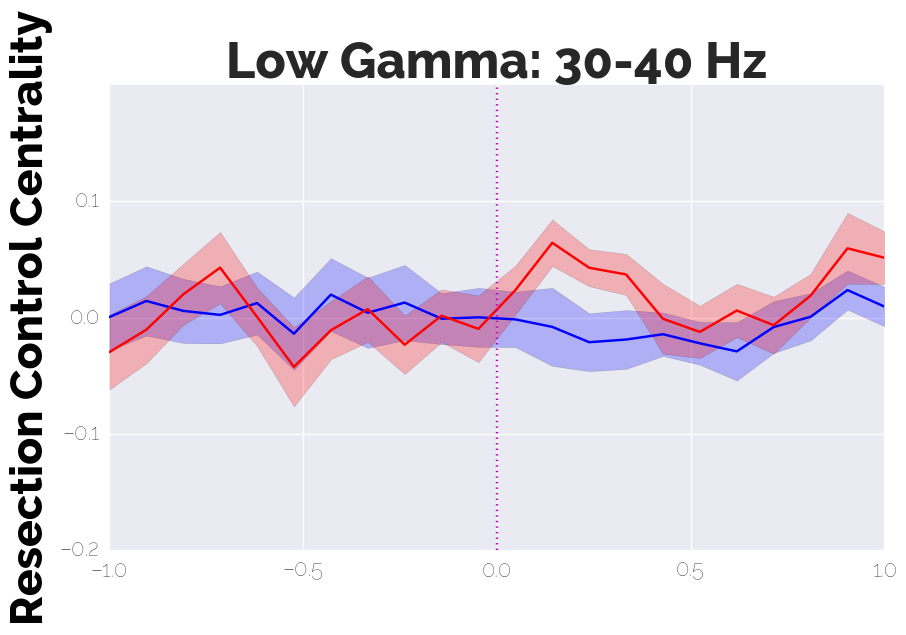

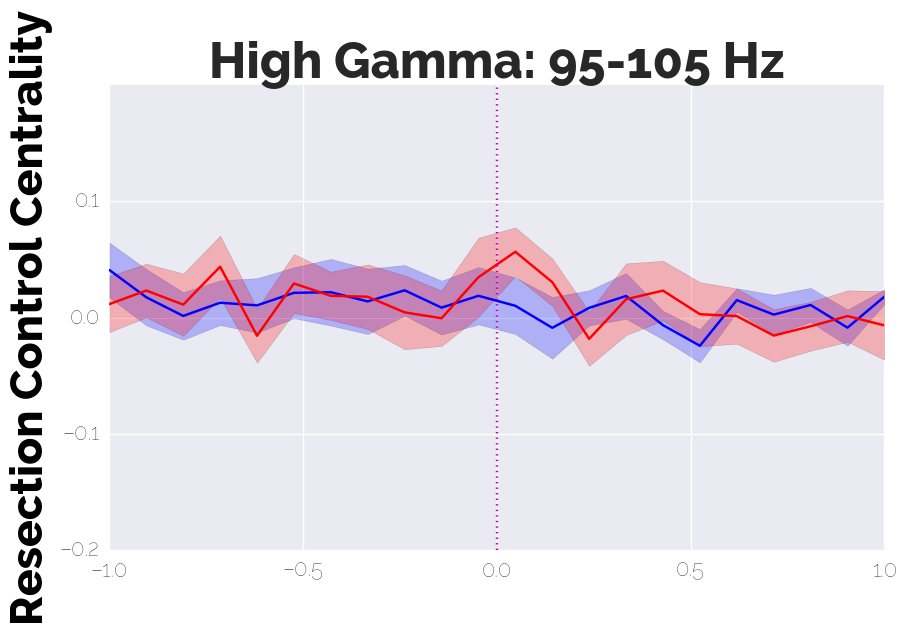

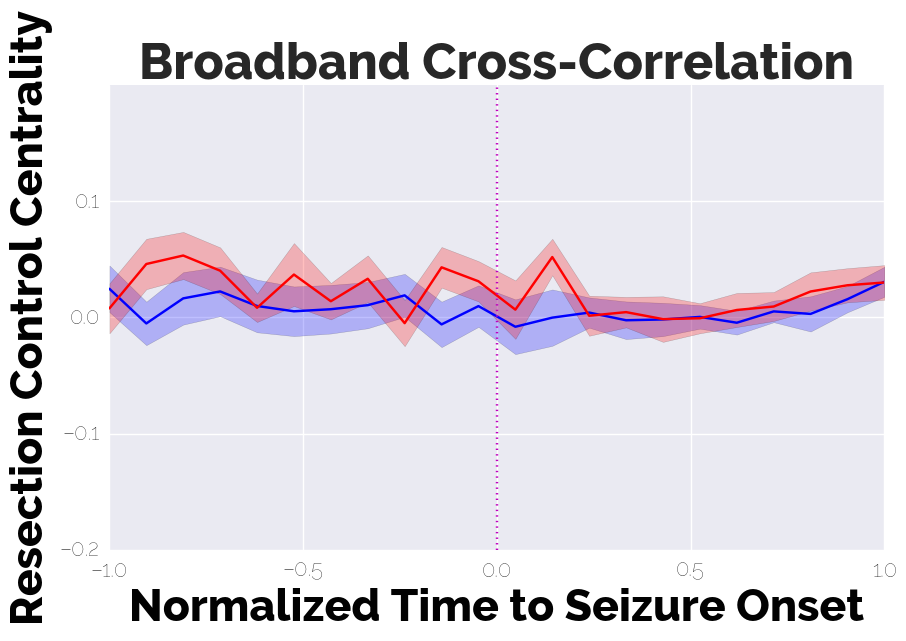

In [14]:
width = -1
for fconn in ['alphatheta','beta','lowgamma','highgamma','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_cres = gather_cres_results(dilate_radius,fconn)
    all_cres = get_norm(all_cres, width=width)
    width = len(map(lambda x: x.values(), all_cres.values())[0][0])
    num_fts = width

    pt_iter = 0
    patient_idx = all_cres.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_cres[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            row_data = np.array((pt_iter+1,))    
            for pid,clips in sorted(all_cres.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']

                avg_data = np.array(())                    
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.hstack((row_data,avg_data)) 

                # Update header
                if(pt_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
            if(get_outcome(outcome) == 'Good'):        
                row_data = np.hstack((row_data,[0]))        
            else:
                row_data = np.hstack((row_data,[1]))
            if(row_data.shape[0] != num_fts+2):
                continue
            ft_matrix.append(row_data)
            pt_iter += 1
    ft_matrix = np.array(ft_matrix)
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')
    # good_outcome_data_err_low = np.nanpercentile(good_outcome_data,2.5,axis=0)
    # good_outcome_data_err_high = np.nanpercentile(good_outcome_data,97.5,axis=0)


    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')
    # poor_outcome_data_err_low = np.nanpercentile(poor_outcome_data,2.5,axis=0)
    # poor_outcome_data_err_high = np.nanpercentile(poor_outcome_data,97.5,axis=0)

    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 32}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 36
    matplotlib.rcParams['axes.titleweight'] = 'bold'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'

    
    plt.figure(dpi=1200,figsize=(10,6))
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0),'b')
    plt.hold(True)
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmedian(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),good_outcome_data_err_low,good_outcome_data_err_high,facecolor='blue',alpha=0.25)
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0), 'r')
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmedian(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),poor_outcome_data_err_low,poor_outcome_data_err_high,facecolor='red',alpha=0.25)
    plt.xlim(( -1.0, 1.0))
    plt.ylim((-0.2, 0.2))
    plt.plot([0,0],[-0.2,0.2],color='m',linestyle=':')
    plt.yticks(np.arange(-0.2,0.2,0.1))
    plt.title(title)
    if fconn == 'broadband_CC':
        plt.xlabel('Normalized Time to Seizure Onset')    
    plt.ylabel('Resection Control Centrality')
    plt.grid(True)
    
    # Make significance indicators
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        plt.text(-0.65,0.15, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        plt.text(-0.65,0.15, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        plt.text(-0.65,0.15, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        plt.text(-0.65,0.15, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':22})
    
    if post_p < 0.001:
        plt.text(0.35,0.15, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        plt.text(0.35,0.15, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        plt.text(0.35,0.15, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        plt.text(0.35,0.15, 'p=%0.2f'%post_p,{'weight':'normal', 'size':22})
    plt.savefig('../../fig/Figure6B_%s.svg'%fconn,bbox_inches='tight', format='svg', dpi=1200)
#     print pre_p, post_p
#     plt.show()


In [21]:
width = -1
for fconn in ['alphatheta','beta','lowgamma','highgamma','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_cres = gather_cres_results(dilate_radius,fconn)
    all_cres = get_norm(all_cres,width=width)
    width = len(map(lambda x: x.values(), all_cres.values())[0][0])
    num_fts = width

    pt_iter = 0
    patient_idx = all_cres.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_cres[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            row_data = np.array((pt_iter+1,))    
            for pid,clips in sorted(all_cres.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']

                avg_data = np.array(())                    
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.hstack((row_data,avg_data)) 

                # Update header
                if(pt_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
            if(get_outcome(outcome) == 'Good'):        
                row_data = np.hstack((row_data,[0]))        
            else:
                row_data = np.hstack((row_data,[1]))
            if(row_data.shape[0] != num_fts+2):
                continue
            ft_matrix.append(row_data)
            pt_iter += 1
    ft_matrix = np.array(ft_matrix)
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
#     fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:width/4.0*3.0],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))
#     fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:width/4.0*3.0],axis=1))
    df_outcome = pd.DataFrame(outcomex)
    df_feat = pd.DataFrame(np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))
    df_outcome.to_csv('../../tmp/Table2_e01B_%s_outcome.csv'%(fconn))
    df_feat.to_csv('../../tmp/Table2_e01B_%s_feat.csv'%(fconn))
    
    roc_auc = auc(fpr,tpr)
    print roc_auc

    p = curve_test(all_data[:,:width/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    print fconn,'pre',p
    p = curve_test(all_data[:,width/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    print fconn,'seizure',p


0.497326203209
alphatheta pre 0.3841
alphatheta seizure 0.4358
0.604278074866
beta pre 0.9747
beta seizure 0.5243
0.716577540107
lowgamma pre 0.7338
lowgamma seizure 0.5105
0.598930481283
highgamma pre 0.9646
highgamma seizure 0.485
0.540106951872
broadband_CC pre 0.7685
broadband_CC seizure 0.7128


<h1>Figure NULL. Control Centrality of Resection Zone in Time-Varying Functional Networks (averaged across seizures) </h1>

In [ ]:
width = -1
all_features = []
roc_results = []
for fconn in ['lowgamma']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_cres = gather_cres_results(dilate_radius,fconn)
    all_cres = get_norm(all_cres, width=width)
    width = len(map(lambda x: x.values(), all_cres.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_cres.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    
    clip_labels = []
    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_cres[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_cres.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']              
                # Create entry for each subtype
                for subtype in ['A', 'B', 'C', 'D']:
                    avg_data = np.array(())
                    for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != subtype:
                            continue
                        res = clip_data                        
                        if(res.shape[0] == num_fts+1):
                            res = res[:num_fts]
                        try:                
                            avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                        except Exception:                
                            avg_data = np.reshape(res,(num_fts,1))                    
                    if patient_id == 'HUP107' and subtype == 'C':
                        print avg_data
                    # Check if subtype exists
                    if avg_data.shape[0] == 0:
                        continue
                    
                    #%DEBUG
#                     print patient_id, clip, avg_data.shape
                    avg_data = np.nanmedian(avg_data,axis=1)
    
                    # Update row_data
                    row_data = np.append([clip_iter+1],avg_data)
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    # Update header
                    if(clip_iter == 0):
                        for t in range(1,num_fts+1):
                            out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                    if(get_outcome(outcome) == 'Good'):        
                        row_data = np.append(row_data,[0])        
                    else:
                        row_data = np.append(row_data,[1])
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    try:
                        all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                    except Exception:
                        all_data = row_data
                    clip_iter += 1
                    clip_labels.append(patient_id+subtype)
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    res= zip(clip_labels,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))
    open('../../fig/tmp.csv','w').write('\n'.join(map(lambda x: '%s,%0.8f'%(x[0],x[1]),res)))

print res

In [ ]:
width = -1
for fconn in ['alphatheta','beta','lowgamma','highgamma','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_cres = gather_cres_results(dilate_radius,fconn)
    all_cres = get_norm(all_cres, width=width)
    width = len(map(lambda x: x.values(), all_cres.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_cres.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_cres[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_cres.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']              
                # Create entry for each subtype
                for subtype in ['A', 'B', 'C', 'D']:
                    avg_data = np.array(())
                    for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != subtype:
                            continue
                        res = clip_data                        
                        if(res.shape[0] == num_fts+1):
                            res = res[:num_fts]
                        try:                
                            avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                        except Exception:                
                            avg_data = np.reshape(res,(num_fts,1))                    
                    # Check if subtype exists
                    if avg_data.shape[0] == 0:
                        continue
                    
                    #%DEBUG
#                     print patient_id, clip, avg_data.shape
                    avg_data = np.nanmedian(avg_data,axis=1)
    
                    # Update row_data
                    row_data = np.append([clip_iter+1],avg_data)
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    # Update header
                    if(clip_iter == 0):
                        for t in range(1,num_fts+1):
                            out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                    if(get_outcome(outcome) == 'Good'):        
                        row_data = np.append(row_data,[0])        
                    else:
                        row_data = np.append(row_data,[1])
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    try:
                        all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                    except Exception:
                        all_data = row_data
                    clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')
    # good_outcome_data_err_low = np.nanpercentile(good_outcome_data,2.5,axis=0)
    # good_outcome_data_err_high = np.nanpercentile(good_outcome_data,97.5,axis=0)


    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')
    # poor_outcome_data_err_low = np.nanpercentile(poor_outcome_data,2.5,axis=0)
    # poor_outcome_data_err_high = np.nanpercentile(poor_outcome_data,97.5,axis=0)
    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 32}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 36
    matplotlib.rcParams['axes.titleweight'] = 'bold'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'

    plt.figure(dpi=1200,figsize=(10,6))
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0),'b')
    plt.hold(True)
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmedian(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),good_outcome_data_err_low,good_outcome_data_err_high,facecolor='blue',alpha=0.25)
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0), 'r')
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmedian(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),poor_outcome_data_err_low,poor_outcome_data_err_high,facecolor='red',alpha=0.25)
    plt.xlim(( -1.0, 1.0))
    plt.ylim((-0.2, 0.2))
    plt.plot([0,0],[-0.2,0.2],color='m',linestyle=':')
    plt.yticks(np.arange(-0.2,0.2,0.1))
    plt.title(title)
    plt.xlabel('Normalized Time to Seizure Onset')
    plt.ylabel('Resection Control Centrality')
    plt.grid(True)
    
    # Make significance indicators
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        plt.text(-0.65,0.15, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        plt.text(-0.65,0.15, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        plt.text(-0.65,0.15, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        plt.text(-0.65,0.15, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':22})
    
    if post_p < 0.001:
        plt.text(0.35,0.15, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        plt.text(0.35,0.15, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        plt.text(0.35,0.15, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        plt.text(0.35,0.15, 'p=%0.2f'%post_p,{'weight':'normal', 'size':22})
#     plt.savefig('../../fig/Figure6B_%s.svg'%fconn,bbox_inches='tight', format='svg', dpi=1200)
    plt.show()

In [ ]:
width = -1
for fconn in ['alphatheta','beta','lowgamma','highgamma','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_cres = gather_cres_results(dilate_radius,fconn)
    all_cres = get_norm(all_cres, width=width)
    width = len(map(lambda x: x.values(), all_cres.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_cres.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_cres[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_cres.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']              
                # Create entry for each subtype
                for subtype in ['A', 'B', 'C', 'D']:
                    avg_data = np.array(())
                    for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != subtype:
                            continue
                        res = clip_data                        
                        if(res.shape[0] == num_fts+1):
                            res = res[:num_fts]
                        try:                
                            avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                        except Exception:                
                            avg_data = np.reshape(res,(num_fts,1))                    
                    # Check if subtype exists
                    if avg_data.shape[0] == 0:
                        continue
                    
                    #%DEBUG
#                     print patient_id, clip, avg_data.shape
                    avg_data = np.nanmedian(avg_data,axis=1)
    
                    # Update row_data
                    row_data = np.append([clip_iter+1],avg_data)
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    # Update header
                    if(clip_iter == 0):
                        for t in range(1,num_fts+1):
                            out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                    if(get_outcome(outcome) == 'Good'):        
                        row_data = np.append(row_data,[0])        
                    else:
                        row_data = np.append(row_data,[1])
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    try:
                        all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                    except Exception:
                        all_data = row_data
                    clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))
    roc_auc = auc(fpr,tpr)
    print roc_auc

    p = curve_test(all_data[:,:width/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    print fconn,'pre',p
    p = curve_test(all_data[:,width/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    print fconn,'seizure',p


<h1> Figure 9 </h1>

In [ ]:
gather_cres_results(-15,'lowgamma')

In [ ]:
width = -1
for dilate_radius in [0,-5,-10,-15,-20,5,10,15,20]:
    fconn = 'lowgamma'

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        if dilate_radius < 0:
            title = 'Low Gamma: 30-40 Hz, Erosion %i%%'%(np.abs(dilate_radius))
        elif dilate_radius > 0:
            title = 'Low Gamma: 30-40 Hz, Dilation %i%%'%(dilate_radius)
        else:
            title = 'Low Gamma: 30-40 Hz, No Dilation/Erosion'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    all_cres = gather_cres_results(dilate_radius,fconn)
    all_cres = get_norm(all_cres, width=width)
    width = len(map(lambda x: x.values(), all_cres.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_cres.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_cres[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_cres.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']              
                # Create entry for each subtype
                for subtype in ['A', 'B', 'C', 'D']:
                    avg_data = np.array(())
                    for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != subtype:
                            continue
                        res = clip_data                        
                        if(res.shape[0] == num_fts+1):
                            res = res[:num_fts]
                        try:                
                            avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                        except Exception:                
                            avg_data = np.reshape(res,(num_fts,1))                    
                    # Check if subtype exists
                    if avg_data.shape[0] == 0:
                        continue
                    
                    #%DEBUG
#                     print patient_id, clip, avg_data.shape
                    avg_data = np.nanmedian(avg_data,axis=1)
                    if np.nanmean(avg_data) == 0:
                        continue
    
                    # Update row_data
                    row_data = np.append([clip_iter+1],avg_data)
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    # Update header
                    if(clip_iter == 0):
                        for t in range(1,num_fts+1):
                            out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                    if(get_outcome(outcome) == 'Good'):        
                        row_data = np.append(row_data,[0])        
                    else:
                        row_data = np.append(row_data,[1])
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    try:
                        all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                    except Exception:
                        all_data = row_data
                    clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')
    # good_outcome_data_err_low = np.nanpercentile(good_outcome_data,2.5,axis=0)
    # good_outcome_data_err_high = np.nanpercentile(good_outcome_data,97.5,axis=0)


    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')
    # poor_outcome_data_err_low = np.nanpercentile(poor_outcome_data,2.5,axis=0)
    # poor_outcome_data_err_high = np.nanpercentile(poor_outcome_data,97.5,axis=0)
    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 32}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 24
    matplotlib.rcParams['axes.labelsize'] = 22
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'

    plt.figure(dpi=1200,figsize=(10,6))
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0),'b')
    plt.hold(True)
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmedian(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),good_outcome_data_err_low,good_outcome_data_err_high,facecolor='blue',alpha=0.25)
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0), 'r')
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmedian(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),poor_outcome_data_err_low,poor_outcome_data_err_high,facecolor='red',alpha=0.25)
    plt.xlim(( -1.0, 1.0))
    plt.ylim((-0.2, 0.2))
    plt.plot([0,0],[-0.2,0.2],color='m',linestyle=':')
    plt.yticks(np.arange(-0.2,0.2,0.1))
    plt.title(title)
    plt.xlabel('Normalized Time to Seizure Onset')
    plt.ylabel('Resection Control Centrality')
    plt.grid(True)
    
    # Make significance indicators
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        plt.text(-0.65,0.15, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        plt.text(-0.65,0.15, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        plt.text(-0.65,0.15, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        plt.text(-0.65,0.15, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':22})
    
    if post_p < 0.001:
        plt.text(0.35,0.15, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        plt.text(0.35,0.15, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        plt.text(0.35,0.15, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        plt.text(0.35,0.15, 'p=%0.2f'%post_p,{'weight':'normal', 'size':22})
#     plt.show()
    plt.savefig('../../fig/Figure9A_%s_%i.svg'%(fconn,dilate_radius),bbox_inches='tight', format='svg', dpi=1200)


In [ ]:
width = -1
results = []
fconn = 'lowgamma'

if(fconn == 'alphatheta'):
    title = 'Alpha/Theta: 5-15 Hz'
if(fconn == 'beta'):
    title = 'Beta: 15-25 Hz'
if(fconn == 'lowgamma'):
    title = 'Low Gamma: 30-40 Hz'
if(fconn == 'highgamma'):
    title = 'High Gamma: 95-105 Hz'
if(fconn == 'broadband_CC'):
    title = 'Broadband Cross-Correlation'
for dilate_radius in [0,-5,-10,-15,-20,5,10,15,20]:
    skip_chop = True
    skip_mayo = False
    skip_hup = False
    all_cres = gather_cres_results(dilate_radius,fconn)
    all_cres = get_norm(all_cres, width=width)
    width = len(map(lambda x: x.values(), all_cres.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_cres.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_cres[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_cres.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']              
                # Create entry for each subtype
                for subtype in ['A', 'B', 'C', 'D']:
                    avg_data = np.array(())
                    for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != subtype:
                            continue
                        res = clip_data                        
                        if(res.shape[0] == num_fts+1):
                            res = res[:num_fts]
                        try:                
                            avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                        except Exception:                
                            avg_data = np.reshape(res,(num_fts,1))                    
                    # Check if subtype exists
                    if avg_data.shape[0] == 0:
                        continue
                    
                    #%DEBUG
#                     print patient_id, clip, avg_data.shape
                    avg_data = np.nanmedian(avg_data,axis=1)
    
                    if np.nanmean(avg_data) == 0 and dilate_radius < 0:
                        continue
    
                    # Update row_data
                    row_data = np.append([clip_iter+1],avg_data)
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    # Update header
                    if(clip_iter == 0):
                        for t in range(1,num_fts+1):
                            out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                    if(get_outcome(outcome) == 'Good'):        
                        row_data = np.append(row_data,[0])        
                    else:
                        row_data = np.append(row_data,[1])
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    try:
                        all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                    except Exception:
                        all_data = row_data
                    clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')
    # good_outcome_data_err_low = np.nanpercentile(good_outcome_data,2.5,axis=0)
    # good_outcome_data_err_high = np.nanpercentile(good_outcome_data,97.5,axis=0)


    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')
    # poor_outcome_data_err_low = np.nanpercentile(poor_outcome_data,2.5,axis=0)
    # poor_outcome_data_err_high = np.nanpercentile(poor_outcome_data,97.5,axis=0)
    
    # Make significance indicators
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    results.append((dilate_radius,roc_auc,all_data.shape[0]))
#     results.append((dilate_radius,roc_auc))
font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 32}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['axes.labelcolor'] = 'black'

plt.figure(dpi=1200,figsize=(10,6))
results = sorted(results,key= lambda x: x[0])
results = np.array(results)
plt.plot(np.arange(-20.0,25.0,5.0),results[:,1],'b-')
plt.hold(True)

plt.xlim((-18.0, 20.0))
plt.ylim((0.0, 1.0))
plt.plot([-20.0,20.0],[0.5,0.5],color='k',linestyle=':')
plt.plot([0.0,0.0],[0.0,1.0],color='m',linestyle='--')
plt.title('AUC as function of \nresection volume')
plt.text(-15.0,0.1,title)

for ii in range(len(results)):
    if not np.isnan(results[ii,1]):
        plt.text(results[ii,0]-1.0,results[ii,1]*1.025,'(%i)'%results[ii,2],fontdict={'size':12,'weight':'normal'})

plt.xlabel('Resection Dilation/Erosion (% of nodes)')
plt.ylabel('AUC')
plt.grid(True)
# plt.show()
plt.savefig('../../fig/Figure9B.svg',bbox_inches='tight')

In [ ]:
results

<h1> Figure 8 Nodal Control Centrality as a function of Time and Frequence </h1>

In [23]:
all_nodal_results = gather_nodal_results(fconn='highgamma')
PATIENT_IDX = sorted(all_nodal_results.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
good_pre_res = {}
good_pre_non_res = {}
good_res = {}
good_non_res = {}
poor_pre_res = {}
poor_pre_non_res = {}
poor_res = {}
poor_non_res = {}
good_res_minus_nonres = {}
poor_res_minus_nonres = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','broadband_CC']:
    # All nodal results
    all_nodal_results = gather_nodal_results(fconn=fconn)
    try:
        good_pre_res[fconn]        
    except KeyError:
        good_pre_res[fconn] = []
        good_pre_non_res[fconn] = []
        good_res[fconn] = []
        good_non_res[fconn] = []
        poor_pre_res[fconn] = []
        poor_pre_non_res[fconn] = []
        poor_res[fconn] = []
        poor_non_res[fconn] = []     
        good_res_minus_nonres[fconn] = []
        poor_res_minus_nonres[fconn] = []
    for patient_id in PATIENT_IDX:
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        pre_res = []
        pre_non_res = []
        res = []
        non_res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        nodal_control_centrality = all_nodal_results[patient_id][first_clip_id]
        resected_node_idx, channels = get_resected_node_dx(patient_id)
        non_resected_node_idx = []
        for k in range(nodal_control_centrality.shape[0]):
            if k not in resected_node_idx:
                non_resected_node_idx.append(k)

        if outcome == 'Good':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
#                 mean_nodal_control_centrality = scipy.stats.zscore(mean_nodal_control_centrality)
                
                positive_nodes = mean_nodal_control_centrality[resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                pre_res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))
#                 pre_res.append(ai)
#                 pre_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[resected_node_idx]))
#                 pre_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                positive_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmean(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                pre_non_res.append(np.nanmean(mean_nodal_control_centrality[non_resected_node_idx]))
#                 pre_non_res.append(ai)
#                 pre_non_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[non_resected_node_idx]))
#                 pre_non_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
    
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
#                 mean_nodal_control_centrality = scipy.stats.zscore(mean_nodal_control_centrality)
                
                positive_nodes = mean_nodal_control_centrality[resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))
#                 res.append(ai)
#                 res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[resected_node_idx]))
#                 res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                positive_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                non_res.append(np.nanmean(mean_nodal_control_centrality[non_resected_node_idx]))
#                 non_res.append(ai)
#                 non_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[non_resected_node_idx]))
#                 non_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))

#             good_pre_res[fconn].append(np.nanmean(pre_res))
#             good_pre_non_res[fconn].append(np.nanmean(pre_non_res))
#             good_res[fconn].append(np.nanmean(res))
#             good_non_res[fconn].append(np.nanmean(non_res))

            good_pre_res[fconn].append(np.nanmean(pre_res))
            good_pre_non_res[fconn].append(np.nanmean(pre_non_res))
            good_res[fconn].append(np.nanmean(res))
            good_non_res[fconn].append(np.nanmean(non_res))
            good_res_minus_nonres[fconn].append(np.nanmean(res)-np.nanmean(non_res))
        if outcome == 'Poor':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
#                 mean_nodal_control_centrality = scipy.stats.zscore(mean_nodal_control_centrality)

                positive_nodes = mean_nodal_control_centrality[resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                pre_res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))
#                 pre_res.append(ai)
#                 pre_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[resected_node_idx]))
#                 pre_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                positive_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                pre_non_res.append(np.nanmean(mean_nodal_control_centrality[non_resected_node_idx]))
#                 pre_non_res.append(ai)
#                 pre_non_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[non_resected_node_idx]))
#                 pre_non_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
    
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue
                
                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
#                 mean_nodal_control_centrality = scipy.stats.zscore(mean_nodal_control_centrality)
                
                positive_nodes = mean_nodal_control_centrality[resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))
#                 res.append(ai)
#                 res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[resected_node_idx]))
#                 res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                positive_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                non_res.append(np.nanmean(mean_nodal_control_centrality[non_resected_node_idx]))
#                 non_res.append(ai)
#                 non_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[non_resected_node_idx]))
#                 non_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                
#             poor_pre_res[fconn].append(np.nanmean(pre_res))
#             poor_pre_non_res[fconn].append(np.nanmean(pre_non_res))
#             poor_res[fconn].append(np.nanmean(res))
#             poor_non_res[fconn].append(np.nanmean(non_res))
            poor_pre_res[fconn].append(np.nanmean(pre_res))
            poor_pre_non_res[fconn].append(np.nanmean(pre_non_res))
            poor_res[fconn].append(np.nanmean(res))
            poor_non_res[fconn].append(np.nanmean(non_res))
            poor_res_minus_nonres[fconn].append(np.nanmean(res)-np.nanmean(non_res))
            


HUP065.Ictal.1.noderes.npz
HUP065.Ictal.3.noderes.npz
HUP065.Ictal.2.noderes.npz
HUP064.Ictal.1.noderes.npz
HUP068.Ictal.1.noderes.npz
HUP068.Ictal.3.noderes.npz
HUP068.Ictal.2.noderes.npz
HUP068.Ictal.5.noderes.npz
HUP068.Ictal.4.noderes.npz
HUP070.Ictal.1.noderes.npz
HUP070.Ictal.2.noderes.npz
HUP070.Ictal.5.noderes.npz
HUP070.Ictal.4.noderes.npz
HUP070.Ictal.7.noderes.npz
HUP070.Ictal.6.noderes.npz
HUP070.Ictal.8.noderes.npz
HUP073.Ictal.1.noderes.npz
HUP073.Ictal.3.noderes.npz
HUP073.Ictal.2.noderes.npz
HUP073.Ictal.5.noderes.npz
HUP073.Ictal.4.noderes.npz
HUP074.Ictal.3.noderes.npz
HUP074.Ictal.2.noderes.npz
HUP074.Ictal.4.noderes.npz
HUP074.Ictal.7.noderes.npz
HUP074.Ictal.6.noderes.npz
HUP075.Ictal.5.noderes.npz
HUP078.Ictal.1.noderes.npz
HUP078.Ictal.3.noderes.npz
HUP078.Ictal.2.noderes.npz
HUP078.Ictal.5.noderes.npz
HUP078.Ictal.4.noderes.npz
HUP080.Ictal.1.noderes.npz
HUP080.Ictal.3.noderes.npz
HUP080.Ictal.2.noderes.npz
HUP080.Ictal.4.noderes.npz
HUP082.Ictal.1.noderes.npz
H

In [24]:
poor_res['broadband_CC'], poor_non_res['broadband_CC'], res, non_res, fconn, outcome

# good_pre_res['alphatheta']

([0.0038767581118763798,
  0.00017907166858782887,
  -8.591626762397674e-05,
  0.011812648304620728,
  0.00036434654727950973,
  -0.0043377927721558809,
  0.0021991062851175382,
  0.0020895340853784761,
  -0.00021073814161199654,
  0.00021362491788925347,
  0.0028176302227528698],
 [6.0769247765152714e-05,
  0.0007778502249293634,
  0.0006695744051808595,
  -0.0015478549966882248,
  0.00067016905418333021,
  0.0034286846978030779,
  -5.4196242012787388e-05,
  -0.00022485227882693511,
  0.0020238824528453049,
  0.00098666724664893336,
  0.00059833184838953973],
 [0.0041683281498834891, 0.0020640087361058204, 0.0022205537822692989],
 [0.00027470031309367307, 0.00079381034297074105, 0.0007264848891042052],
 'broadband_CC',
 'Poor')

In [25]:
for fconn in ['alphatheta','beta','lowgamma','highgamma','broadband_CC']:
    poor_pre_res[fconn] = [x for x in poor_pre_res[fconn] if str(x) != 'nan']
    poor_pre_non_res[fconn] = [x for x in poor_pre_non_res[fconn] if str(x) != 'nan']
    good_pre_res[fconn] = [x for x in good_pre_res[fconn] if str(x) != 'nan']
    good_pre_non_res[fconn] = [x for x in good_pre_non_res[fconn] if str(x) != 'nan']
    
    poor_res[fconn] = [x for x in poor_res[fconn] if str(x) != 'nan']
    poor_non_res[fconn] = [x for x in poor_non_res[fconn] if str(x) != 'nan']
    good_res[fconn] = [x for x in good_res[fconn] if str(x) != 'nan']
    good_non_res[fconn] = [x for x in good_non_res[fconn] if str(x) != 'nan']
    

Alpha/Theta:
 5-15 Hz pre -0.539359889971 0.589638551627 0.0528910554274
Alpha/Theta:
 5-15 Hz post -0.809039834956 0.418492233447 -0.0716818740211
Alpha/Theta:
 5-15 Hz pred 0.589638551627
Beta:
 15-25 Hz pre 0.0898933149951 0.928371993507 0.275700929941
Beta:
 15-25 Hz post -1.8428129574 0.0653563243068 -0.534827709391
Beta:
 15-25 Hz pred 0.224915884016
Low Gamma:
 30-40 Hz pre 0.719146519961 0.472050646798 0.366397062783
Low Gamma:
 30-40 Hz post -1.57313301241 0.1156880223 -0.411049451244
Low Gamma:
 30-40 Hz pred 0.280712665268
High Gamma:
 95-105 Hz pre 0.224733287488 0.822186767238 0.224276701908
High Gamma:
 95-105 Hz post -0.0449466574975 0.964149827095 -0.181782826917
High Gamma:
 95-105 Hz pred 0.928371993507
Broadband
 Cross-Correlation pre -0.314626602483 0.753045178359 0.0519238988729
Broadband
 Cross-Correlation post -0.224733287488 0.822186767238 -0.176636975898
Broadband
 Cross-Correlation pred 0.685830434452
Alpha/Theta:
 5-15 Hz pre 1.48323969742 0.138010737569 0.39

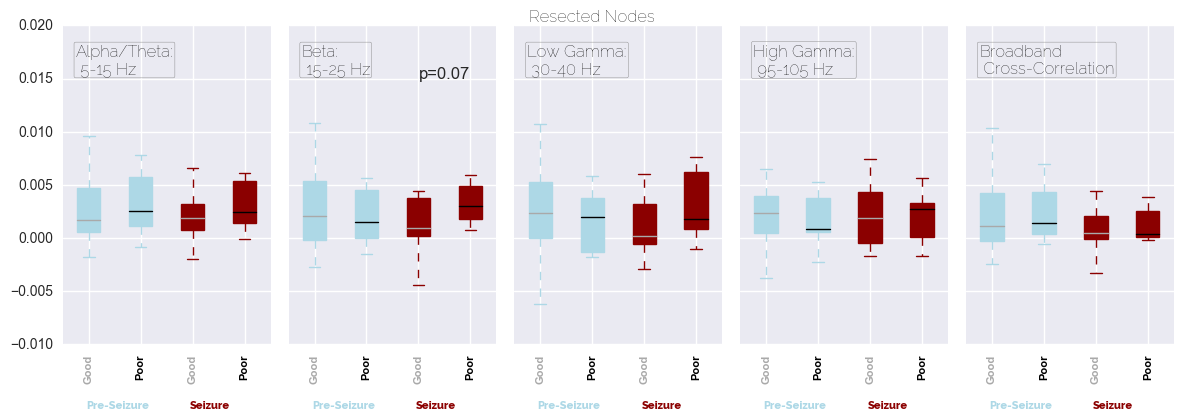

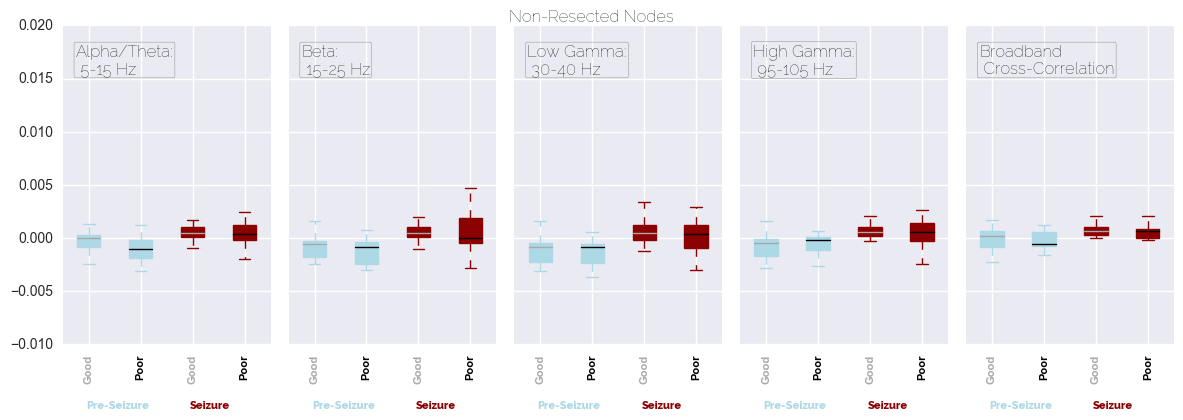

In [27]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.015

# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,5,sharey=True)
fig.set_size_inches((12,4))
fig.suptitle('Resected Nodes',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], poor_pre_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd
    s,pred_p = scipy.stats.ranksums(good_res_minus_nonres[fconn],poor_res_minus_nonres[fconn])    
    print title, 'pred',pred_p
    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
# plt.show()
fig.savefig('%s/../fig/Figure8A.svg'%(comp_dir))


fig,axs = plt.subplots(1,5,sharey=True)
fig.set_size_inches((12,4))
fig.suptitle('Non-Resected Nodes',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_non_res[fconn],poor_pre_non_res[fconn],good_non_res[fconn],poor_non_res[fconn]])
    draw_plot([good_pre_non_res[fconn],poor_pre_non_res[fconn],good_non_res[fconn],poor_non_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(good_pre_non_res[fconn], poor_pre_non_res[fconn])
    cd = cohen_d(good_pre_non_res[fconn], poor_pre_non_res[fconn])
    print title, 'pre', s,pre_p,cd
    s,post_p = scipy.stats.ranksums(good_non_res[fconn], poor_non_res[fconn])
    cd = cohen_d(good_non_res[fconn], poor_non_res[fconn])
    print title, 'post',s,post_p,cd
    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title,\
            fontdict={'family':'raleway','size':12,'color':'black'},\
           bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})

plt.tight_layout()
# plt.show()
fig.savefig('%s/../fig/Figure8B.svg'%(comp_dir))

Alpha/Theta:
 5-15 Hz pre 3.06894418627 0.0021481672048 0.0528910554274
Alpha/Theta:
 5-15 Hz post 2.68928098797 0.00716061170808 -0.0716818740211
Beta:
 15-25 Hz pre 3.13222138598 0.0017348900222 0.275700929941
Beta:
 15-25 Hz post 1.20226679462 0.229260177658 -0.534827709391
Low Gamma:
 30-40 Hz pre 3.22713718556 0.0012503549718 0.366397062783
Low Gamma:
 30-40 Hz post 0.0316385998584 0.974760260552 -0.411049451244
High Gamma:
 95-105 Hz pre 3.41696878471 0.000633225397287 0.224276701908
High Gamma:
 95-105 Hz post 1.26554399434 0.205676388053 -0.181782826917
Broadband
 Cross-Correlation pre 1.99323179108 0.0462360714437 0.0519238988729
Broadband
 Cross-Correlation post -0.0949157995752 0.924381706931 -0.176636975898
Alpha/Theta:
 5-15 Hz pre 2.85642796867 0.00428437205926 0.829961117091
Alpha/Theta:
 5-15 Hz post 1.93711781783 0.052730943057 0.392368532389
Beta:
 15-25 Hz pre 2.39677289325 0.016540171856 0.612314450336
Beta:
 15-25 Hz post 2.7907629579 0.00525839670378 1.07447750384

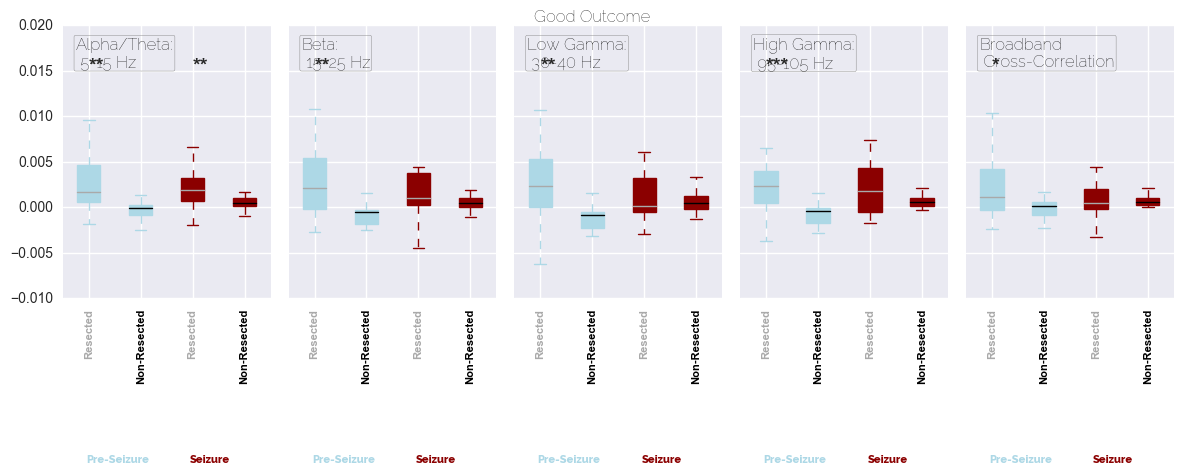

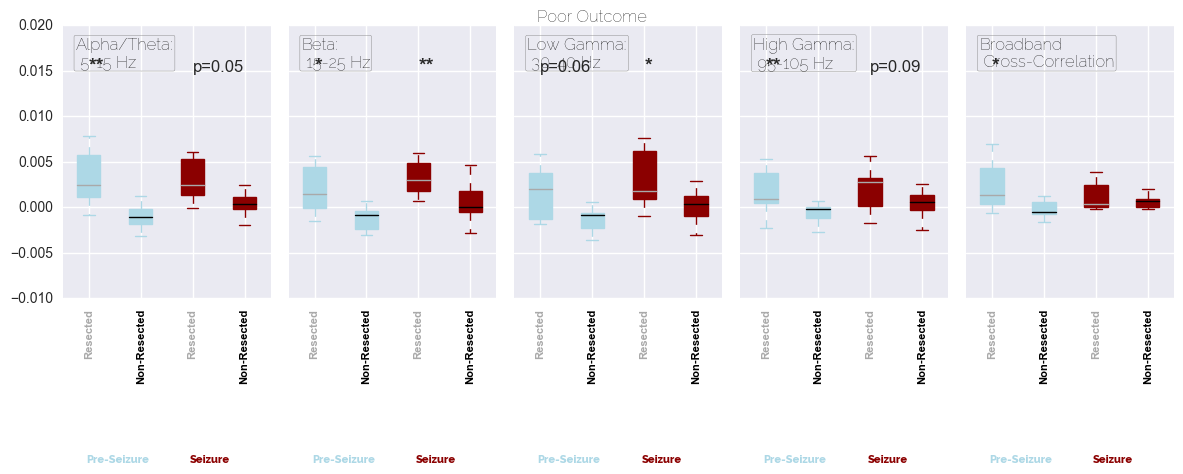

In [28]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.015
# star_y = 1.5

# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,5,sharey=True)
fig.set_size_inches((12,4))
fig.suptitle('Good Outcome',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

    draw_plot([good_pre_res[fconn],good_pre_non_res[fconn],good_res[fconn],good_non_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], good_pre_non_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], good_non_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd
    ax.text(0.95,min_y-(max_y-min_y)*0.2*3,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2*3,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Resected','Non-Resected','Resected','Non-Resected'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
# plt.show()
fig.savefig('%s/../fig/Figure8A.svg'%(comp_dir))


fig,axs = plt.subplots(1,5,sharey=True)
fig.set_size_inches((12,4))
fig.suptitle('Poor Outcome',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

    draw_plot([poor_pre_res[fconn],poor_pre_non_res[fconn],poor_res[fconn],poor_non_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(poor_pre_res[fconn], poor_pre_non_res[fconn])
    cd = cohen_d(poor_pre_res[fconn], poor_pre_non_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(poor_res[fconn], poor_non_res[fconn])
    cd = cohen_d(poor_res[fconn], poor_non_res[fconn])
    print title, 'post',s,post_p, cd
    ax.text(0.95,min_y-(max_y-min_y)*0.2*3,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2*3,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title,\
            fontdict={'family':'raleway','size':12,'color':'black'},\
           bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Resected','Non-Resected','Resected','Non-Resected'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})

plt.tight_layout()
# plt.show()
fig.savefig('%s/../fig/Figure8B.svg'%(comp_dir))

<h1>Figure 7B. Change in synchronizability as a feature </h1>

alphatheta 0.0705605699059 0.943747492813
beta -0.776166268965 0.437650819576
lowgamma -1.66993348777 0.0949325238434
highgamma -0.258722089655 0.79584967464
broadband_CC 0.493923989341 0.621359861767


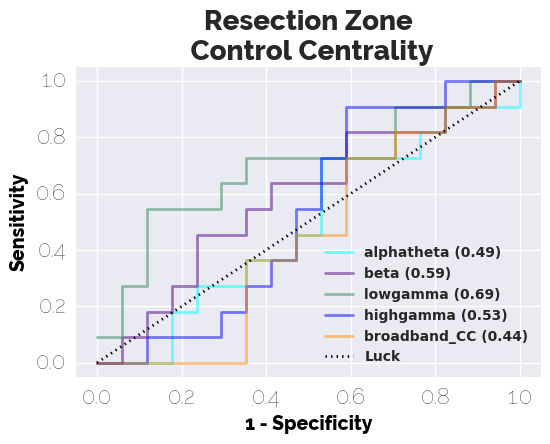

In [64]:
fig,axs = plt.subplots(1,1)
ax = axs
fig.set_size_inches((6,4))

width = -1
all_features = []
roc_results = []
for fconn in ['alphatheta','beta','lowgamma','highgamma','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_cres = gather_cres_results(dilate_radius,fconn)
    all_cres = get_norm(all_cres, width=width)
    width = len(map(lambda x: x.values(), all_cres.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_cres.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_cres[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_cres.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']              
                avg_data = np.array(())
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                #%DEBUG
#                     print patient_id, clip, avg_data.shape
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.append([clip_iter+1],avg_data)
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                # Update header
                if(clip_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                if(get_outcome(outcome) == 'Good'):        
                    row_data = np.append(row_data,[0])        
                else:
                    row_data = np.append(row_data,[1])
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                try:
                    all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                except Exception:
                    all_data = row_data
                clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    good_outcome_feature = np.nanmean(all_data[outcomex==0,width/2:],axis=1)-np.nanmean(all_data[outcomex==0,:width/2],axis=1)
    poor_outcome_feature = np.nanmean(all_data[outcomex==1,width/2:],axis=1)-np.nanmean(all_data[outcomex==1,:width/2],axis=1)
    all_features.append(good_outcome_feature)
    all_features.append(poor_outcome_feature)
    s,p = scipy.stats.ranksums(good_outcome_feature, poor_outcome_feature)
    print fconn, s,p
    if p < 0.05:
        print fconn, s,p
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    roc_results.append((fconn,roc_auc,fpr,tpr))
    
# ax.boxplot(all_features)

# ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
# ax.set_xticklabels(['Good','Poor','Good','Poor','Good','Poor','Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
# ax.set_ylim([-0.35,0.15])
# for ii in range(1,10,2):
#     ax.get_xticklabels()[ii].set_color('black')
# for ii in range(0,10,2):
#     ax.get_xticklabels()[ii].set_color('darkgray')
# ax.text(0.75,-0.3,'Alpha/Theta:\n 5-15 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(2.75,-0.3,'Beta:\n 15-25 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(4.75,-0.3,'Low Gamma:\n 30-40 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(5.25,0.1,'*',fontdict={'size':22,'weight':'bold'})
# ax.text(6.75,-0.3,'High Gamma:\n 95-105 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(8.75,-0.3,'Broadband\n Cross-\nCorrelation',fontdict={'size':10,'weight':'normal'})
# ax.set_ylabel('Change in Resection\n Control Centrality \n(pre-ictal to ictal)',fontdict={'size':14,'weight':'bold'})

# ax = axs[1]
colors = ['cyan', 'indigo', 'seagreen', 'blue', 'darkorange', 'yellow']
i = 0
for fconn, roc_auc, fpr, tpr in roc_results:
    ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '%s (%0.2f)'%(fconn,roc_auc), alpha=0.5)
    ax.hold(True)
    i += 1
# Plot the ROC curve for luck along with area
ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k', label='Luck')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

ax.set_xlabel('1 - Specificity',fontdict={'size':14,'weight':'bold'})
ax.set_ylabel('Sensitivity',fontdict={'size':14,'weight':'bold'})
ax.legend(loc="lower right",prop={'size':10,'weight':'bold', 'family':'normal'})

plt.title('Resection Zone\n Control Centrality',fontdict={'size':20})
plt.savefig('../../fig/Figure7B.svg',bbox_inches='tight', format='svg', dpi=1200)

<h1>Figure 5NEW. Node-level control centrality as a feature </h1>

HUP065.Ictal.1.noderes.npz
HUP065.Ictal.3.noderes.npz
HUP065.Ictal.2.noderes.npz
HUP064.Ictal.1.noderes.npz
HUP068.Ictal.1.noderes.npz
HUP068.Ictal.3.noderes.npz
HUP068.Ictal.2.noderes.npz
HUP068.Ictal.5.noderes.npz
HUP068.Ictal.4.noderes.npz
HUP070.Ictal.1.noderes.npz
HUP070.Ictal.2.noderes.npz
HUP070.Ictal.5.noderes.npz
HUP070.Ictal.4.noderes.npz
HUP070.Ictal.7.noderes.npz
HUP070.Ictal.6.noderes.npz
HUP070.Ictal.8.noderes.npz
HUP073.Ictal.1.noderes.npz
HUP073.Ictal.3.noderes.npz
HUP073.Ictal.2.noderes.npz
HUP073.Ictal.5.noderes.npz
HUP073.Ictal.4.noderes.npz
HUP074.Ictal.3.noderes.npz
HUP074.Ictal.2.noderes.npz
HUP074.Ictal.4.noderes.npz
HUP074.Ictal.7.noderes.npz
HUP074.Ictal.6.noderes.npz
HUP075.Ictal.5.noderes.npz
HUP078.Ictal.1.noderes.npz
HUP078.Ictal.3.noderes.npz
HUP078.Ictal.2.noderes.npz
HUP078.Ictal.5.noderes.npz
HUP078.Ictal.4.noderes.npz
HUP080.Ictal.1.noderes.npz
HUP080.Ictal.3.noderes.npz
HUP080.Ictal.2.noderes.npz
HUP080.Ictal.4.noderes.npz
HUP082.Ictal.1.noderes.npz
H

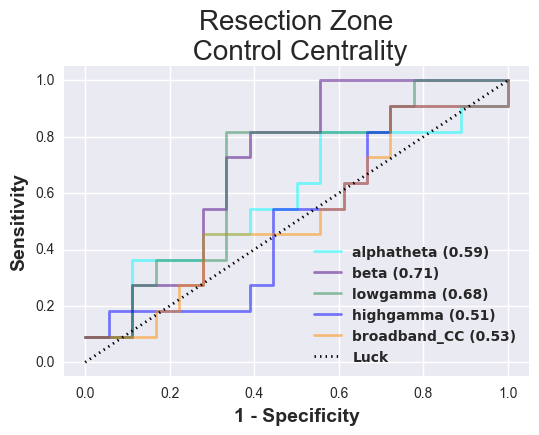

In [43]:
fig,axs = plt.subplots(1,1)
ax = axs
fig.set_size_inches((6,4))

all_nodal_results = gather_nodal_results(fconn='highgamma')
PATIENT_IDX = sorted(all_nodal_results.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

roc_results = []
for fconn in ['alphatheta','beta','lowgamma','highgamma','broadband_CC']:
    feature_vector = []
    outcomex = []

    # All nodal results
    all_nodal_results = gather_nodal_results(fconn=fconn)

    for patient_id in PATIENT_IDX:
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        pre_res = []
        pre_non_res = []
        res = []
        non_res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        nodal_control_centrality = all_nodal_results[patient_id][first_clip_id]
        resected_node_idx, channels = get_resected_node_dx(patient_id)
        non_resected_node_idx = []
        for k in range(nodal_control_centrality.shape[0]):
            if k not in resected_node_idx:
                non_resected_node_idx.append(k)

        if outcome == 'Good':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
#                 mean_nodal_control_centrality = scipy.stats.zscore(mean_nodal_control_centrality)
                
                positive_nodes = mean_nodal_control_centrality[resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                pre_res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))
#                 pre_res.append(ai)
#                 pre_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[resected_node_idx]))
#                 pre_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                positive_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmean(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                pre_non_res.append(np.nanmean(mean_nodal_control_centrality[non_resected_node_idx]))
#                 pre_non_res.append(ai)
#                 pre_non_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[non_resected_node_idx]))
#                 pre_non_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
    
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
#                 mean_nodal_control_centrality = scipy.stats.zscore(mean_nodal_control_centrality)
                
                positive_nodes = mean_nodal_control_centrality[resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))
#                 res.append(ai)
#                 res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[resected_node_idx]))
#                 res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                positive_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                non_res.append(np.nanmean(mean_nodal_control_centrality[non_resected_node_idx]))
#                 non_res.append(ai)
#                 non_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[non_resected_node_idx]))
#                 non_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))

            feature_vector.append(np.nanmean(res))
            outcomex.append(0)
        if outcome == 'Poor':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
#                 mean_nodal_control_centrality = scipy.stats.zscore(mean_nodal_control_centrality)

                positive_nodes = mean_nodal_control_centrality[resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                pre_res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))
#                 pre_res.append(ai)
#                 pre_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[resected_node_idx]))
#                 pre_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                positive_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                pre_non_res.append(np.nanmean(mean_nodal_control_centrality[non_resected_node_idx]))
#                 pre_non_res.append(ai)
#                 pre_non_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[non_resected_node_idx]))
#                 pre_non_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
    
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue
                
                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
#                 mean_nodal_control_centrality = scipy.stats.zscore(mean_nodal_control_centrality)
                
                positive_nodes = mean_nodal_control_centrality[resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))
#                 res.append(ai)
#                 res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[resected_node_idx]))
#                 res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                positive_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                positive_nodes = positive_nodes[positive_nodes>0]
                negative_nodes = mean_nodal_control_centrality[non_resected_node_idx]
                negative_nodes = negative_nodes[negative_nodes<0]
                ai = (np.abs(np.nanmedian(positive_nodes))-np.abs(np.nanmedian(negative_nodes)))/(np.abs(np.nanmedian(positive_nodes))+np.abs(np.nanmedian(negative_nodes)))
                non_res.append(np.nanmean(mean_nodal_control_centrality[non_resected_node_idx]))
#                 non_res.append(ai)
#                 non_res.append(scipy.stats.kurtosis(mean_nodal_control_centrality[non_resected_node_idx]))
#                 non_res.append(cohen_d(mean_nodal_control_centrality[resected_node_idx],mean_nodal_control_centrality[non_resected_node_idx]))
                
            feature_vector.append(np.nanmean(res))
            outcomex.append(1)
            
    feature_vector = np.array(feature_vector)
    outcomex = np.array(outcomex)
    s,p = scipy.stats.ranksums(feature_vector[outcomex==0], feature_vector[outcomex==1])
    print fconn, s,p
    if p < 0.05:
        print fconn, s,p
    
    fpr,tpr,threshold = roc_curve(outcomex,feature_vector)    
    roc_auc = auc(fpr,tpr)
    roc_results.append((fconn,roc_auc,fpr,tpr))
    
# ax = axs[1]
colors = ['cyan', 'indigo', 'seagreen', 'blue', 'darkorange', 'yellow']
i = 0
for fconn, roc_auc, fpr, tpr in roc_results:
    ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '%s (%0.2f)'%(fconn,roc_auc), alpha=0.5)
    ax.hold(True)
    i += 1
# Plot the ROC curve for luck along with area
ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k', label='Luck')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

ax.set_xlabel('1 - Specificity',fontdict={'size':14,'weight':'bold'})
ax.set_ylabel('Sensitivity',fontdict={'size':14,'weight':'bold'})
ax.legend(loc="lower right",prop={'size':10,'weight':'bold', 'family':'normal'})

plt.title('Resection Zone\n Control Centrality',fontdict={'size':20})
plt.show()

In [38]:
tmp = feature_vector
tmp[np.isnan(feature_vector)] = []
print tmp

ValueError: NumPy boolean array indexing assignment cannot assign 0 input values to the 2 output values where the mask is true

<h1>Figure 5NEW Part A: Time Varying </h1>

0.9655 0.0 0.60101010101


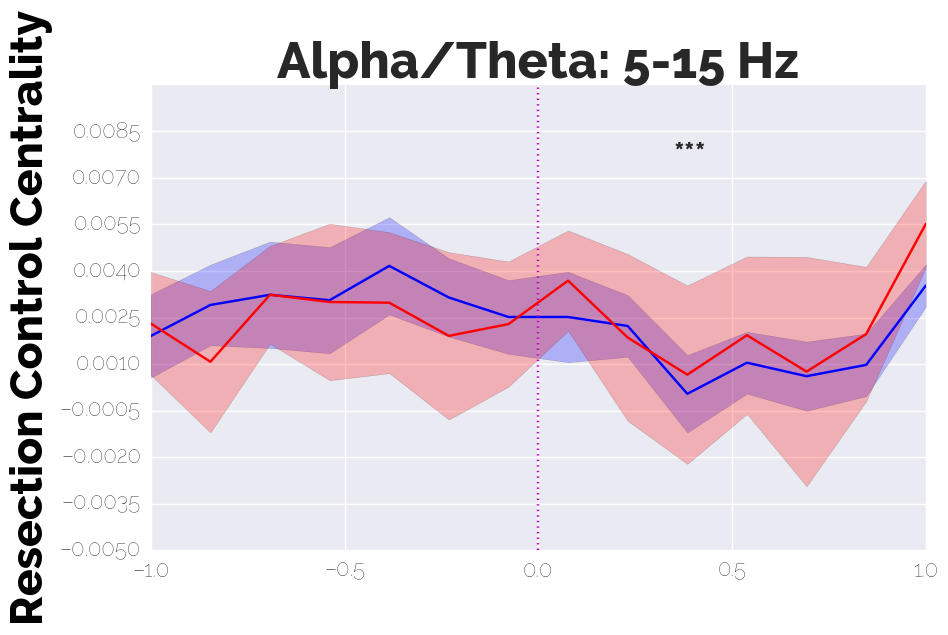

0.3704 0.0 0.550505050505


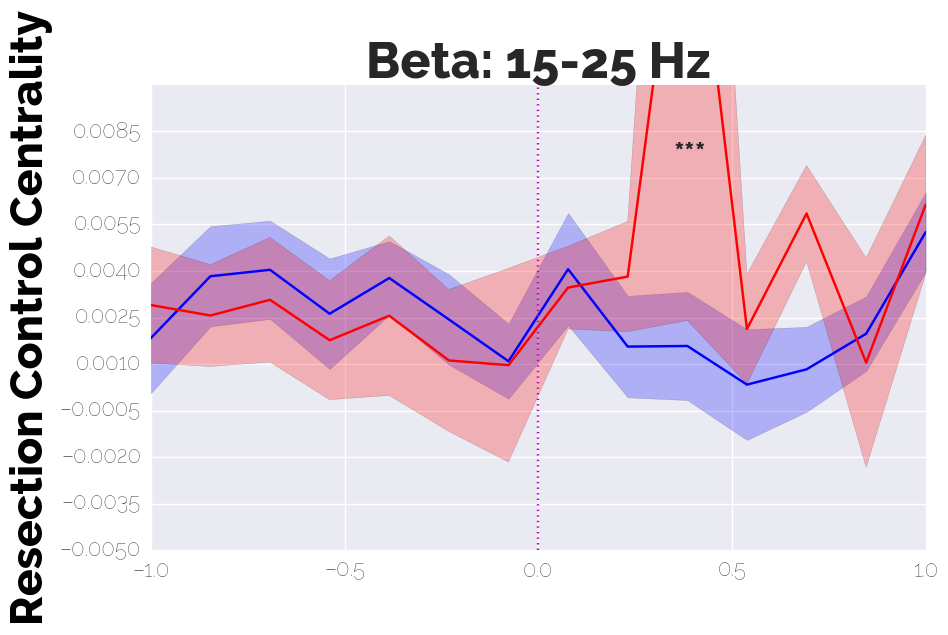

0.5828 0.0 0.666666666667


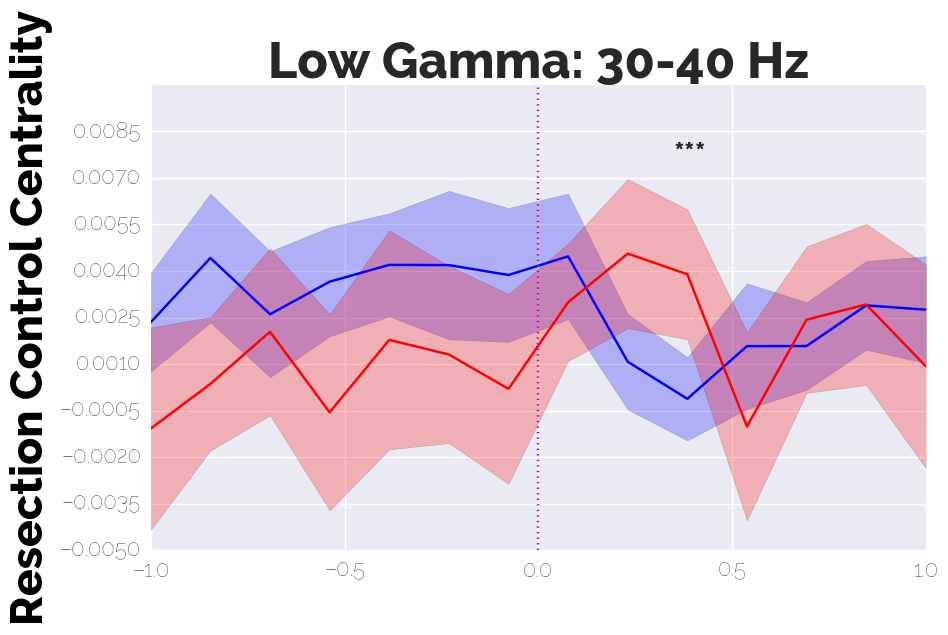

0.6853 0.0 0.489898989899


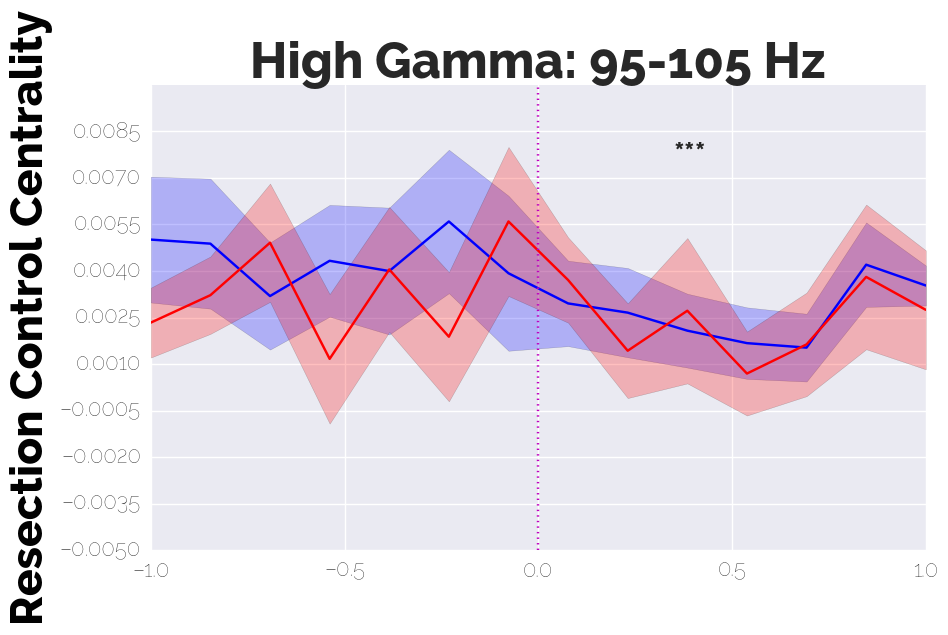

0.8752 0.0 0.59595959596


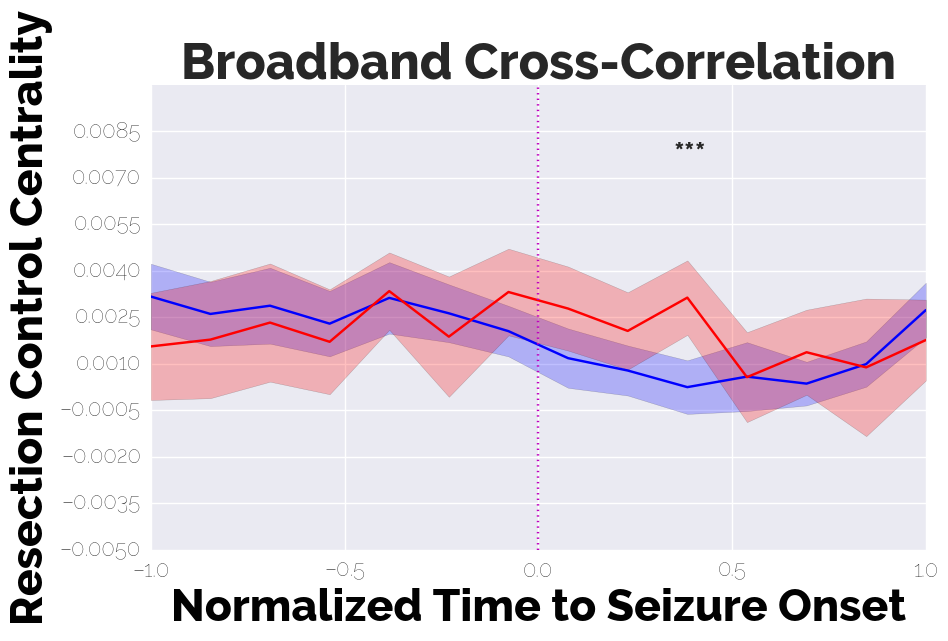

In [22]:
width = 14

# xlim_low = -0.01
# xlim_high = 0.03
ylim_low = -0.005
ylim_high = 0.01
star_y = 0.0075
for fconn in ['alphatheta','beta','lowgamma','highgamma','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_nodal_results = gather_nodal_results(fconn=fconn)    
    
    if width == -1:
        width = 1E100
        for pt, clips in all_nodal_results.items():
            for event_id, clip in clips.items():                
                if clip.shape[1] < width:
                    width = clip.shape[1]

    for pt, clips in all_nodal_results.items():
        for event_id, clip in clips.items():            
            xp = np.linspace(-1.0,1.0,clip.shape[1])
            f = scipy.interpolate.interp1d(xp,clip)
            noderes_norm = f(np.linspace(-1.0,1.0,width))
            all_nodal_results[pt][event_id] = noderes_norm
    
    num_fts = width
    pt_iter = 0
    patient_idx = all_nodal_results.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_nodal_results[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            row_data = np.array((pt_iter+1,))    
            
            # Get resected nodes and non-resected nodes
            first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
            nodal_control_centrality = all_nodal_results[patient_id][first_clip_id]
            resected_node_idx, channels = get_resected_node_dx(patient_id)
            non_resected_node_idx = []
            for k in range(nodal_control_centrality.shape[0]):
                if k not in resected_node_idx:
                    non_resected_node_idx.append(k)
                
            for pid,clips in sorted(all_nodal_results.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']

                avg_data = np.array(())                    
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    res = np.nanmean(clip_data[resected_node_idx,:],axis=0)
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
#                 print pid, avg_data.shape
                avg_data = np.nanmean(avg_data,axis=1)
                

                # Update row_data
                row_data = np.hstack((row_data,avg_data)) 

                # Update header
                if(pt_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
            if(get_outcome(outcome) == 'Good'):        
                row_data = np.hstack((row_data,[0]))        
            else:
                row_data = np.hstack((row_data,[1]))
            if(row_data.shape[0] != num_fts+2):
                continue
            ft_matrix.append(row_data)
            pt_iter += 1
    ft_matrix = np.array(ft_matrix)
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')
    # good_outcome_data_err_low = np.nanpercentile(good_outcome_data,2.5,axis=0)
    # good_outcome_data_err_high = np.nanpercentile(good_outcome_data,97.5,axis=0)


    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')
    # poor_outcome_data_err_low = np.nanpercentile(poor_outcome_data,2.5,axis=0)
    # poor_outcome_data_err_high = np.nanpercentile(poor_outcome_data,97.5,axis=0)

    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 32}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 36
    matplotlib.rcParams['axes.titleweight'] = 'bold'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'

    
    plt.figure(dpi=1200,figsize=(10,6))
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmean(good_outcome_data,axis=0),'b')
    plt.hold(True)
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmean(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmean(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),good_outcome_data_err_low,good_outcome_data_err_high,facecolor='blue',alpha=0.25)
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmean(poor_outcome_data,axis=0), 'r')
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmean(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmean(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),poor_outcome_data_err_low,poor_outcome_data_err_high,facecolor='red',alpha=0.25)
    plt.xlim(( -1.0, 1.0))
    plt.ylim((ylim_low, ylim_high))
    plt.plot([0,0],[ylim_low, ylim_high],color='m',linestyle=':')
    plt.yticks(np.arange(ylim_low, ylim_high,(ylim_high-ylim_low)/10.0))
    plt.title(title)
    if fconn == 'broadband_CC':
        plt.xlabel('Normalized Time to Seizure Onset')    
    plt.ylabel('Resection Control Centrality')
    plt.grid(True)
    
    # Make significance indicators
#     fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:width/4.0*3.0],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
#     fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:width/4.0*3.0],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
#     fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:width/4.0*3.0],axis=1))
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:width/4.0*3.0],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        plt.text(-0.65,star_y, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        plt.text(-0.65,star_y, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        plt.text(-0.65,star_y, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        plt.text(-0.65,star_y, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':22})
    
    if post_p < 0.001:
        plt.text(0.35,star_y, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        plt.text(0.35,star_y, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        plt.text(0.35,star_y, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        plt.text(0.35,star_y, 'p=%0.2f'%post_p,{'weight':'normal', 'size':22})
#     plt.savefig('../../fig/Figure6B_%s.svg'%fconn,bbox_inches='tight', format='svg', dpi=1200)
    print pre_p, post_p, roc_auc
    plt.show()


In [47]:
all_nodal_results['HUP064']['1'].shape

(86, 214)

<h1> e01B. Cross-Validation using basic connectivity features </h1>

In [ ]:
plt.hold(True)
rsrs = np.random.randint(100,size=1)
for rs in range(rsrs,rsrs+3):
    # Parameters
    k1 = 5 # Number of features remaining after first round of feature reduction
    # k2 = 350 # Number of features remaining after second round of feature reduction

    # Load DataFrame
    # Load DataFrame
#     df1 = pd.read_csv('~/gdrive/aim3/code/data/e01B_broadband_CC.csv')
#     df2 = pd.read_csv('~/gdrive/aim3/code/data/e01B_alphatheta.csv')
#     df3 = pd.read_csv('~/gdrive/aim3/code/data/e01B_beta.csv')
#     df4 = pd.read_csv('~/gdrive/aim3/code/data/e01B_lowgamma.csv')
    df5 = pd.read_csv('~/gdrive/aim3/code/data/e01B_highgamma.csv')
#     df = pd.concat([df1, df2, df3, df4, df5],axis=1)
    df = df5

    if(True):
        df = df.dropna()

    # Generate feature matrix and target vectors
    print 'Generating feature matrix ...'
    X = np.array(df[df.columns.difference(['Unnamed: 0','pt_id','Outcome'])])
    print X.shape
#     y = np.array(df.Outcome.iloc[:,0])
    y = np.array(df.Outcome)

    if(False):
        imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
        X = imp.fit(X).transform(X)    

    # Build a Random Forest with 1000 estimators
    classifier_VR = RandomForestClassifier(n_estimators=1000, random_state=rs)

    # Perform the first prune using ANOVA F test using mutual information
    print 'Feature reduction to %i features ...'%(min(k1,X.shape[1]))
    prune1 = SelectKBest(mutual_info_classif, k=min(k1,X.shape[1]))
    X = prune1.fit_transform(X,y)

    # # Perform a second prune by selecting features optimally branched using the classifier
    # print 'Second round of feature reduction ...'
    # clf = classifier_VR.fit(X,y)
    # model = SelectFromModel(clf, prefit=True)
    # X = model.transform(X)

    # # Generate polynomial (degree 2) with interaction term feature set to account 
    # # for non-linear combinations.
    # # This will include cross-interaction terms to take into account non-linear combinations 
    # # of clinical variables.
    # print 'Generating polynomial combination of features ...'
    # poly = PolynomialFeatures(2)
    # X = poly.fit_transform(X)

    # # Perform the third prune using ANOVA F test using mutual information
    # print 'Final round of feature reduction to %i features ...'%k2
    # prune2 = SelectKBest(mutual_info_classif, k=k2)
    # X = prune2.fit_transform(X,y)

    # Compute 8-fold cross-validation True Positive Rate (TPR) and False Positive Rate (FPR)
    # to generate ROC curves.
    print 'Performing cross validation ...'
    n_splits = 5
    cv = StratifiedKFold(n_splits=n_splits, random_state=rs)
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    from itertools import cycle
    colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
    lw = 2
    i = 0

    # for (train, test) in cv.split(X,y):
    for (train, test), color in zip(cv.split(X, y), colors):
        # Ignore any folds that do not have any poor outcomes 
        # to maintain representation of entire dataset.
        if(sum(y[test]) == 0):
            print train,test
            continue
        probas_ = classifier_VR.fit(X[train], y[train]).predict_proba(X[test])
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=color, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',label='Luck')

    # Compute mean Area Under Curve (AUC)    
    print 'Computing AUC of ROC ...'
    mean_tpr /= n_splits
    mean_tpr[-1] = 1.0
    mean_auc_VR = auc(mean_fpr, mean_tpr)
    sigma_auc_VR = 2*np.sqrt(mean_auc_VR*(1-mean_auc_VR)/4)

    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc_VR, lw=lw)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # Compute Mean AUC and Confidence interval using \sigma_max
    print "Mean AUC: %0.3f $\pm$ %0.3f"%(mean_auc_VR,sigma_auc_VR)

<h1> e01B. Prediction on Hold Out Test Set </h1>

<h2> Create developmental and validation cohorts </h2>

In [ ]:
# Load DataFrame
df1 = pd.read_csv('~/gdrive/aim3/code/data/e01B_broadband_CC.csv')
df2 = pd.read_csv('~/gdrive/aim3/code/data/e01B_alphatheta.csv')
cols_to_use = df2.columns.difference(df1.columns)
df = pd.merge(df1, df2[cols_to_use], left_index=True, right_index=True, how='outer')

df3 = pd.read_csv('~/gdrive/aim3/code/data/e01B_beta.csv')
cols_to_use = df3.columns.difference(df.columns)
df = pd.merge(df, df3[cols_to_use], left_index=True, right_index=True, how='outer')

df4 = pd.read_csv('~/gdrive/aim3/code/data/e01B_lowgamma.csv')
cols_to_use = df4.columns.difference(df.columns)
df = pd.merge(df, df4[cols_to_use], left_index=True, right_index=True, how='outer')

df5 = pd.read_csv('~/gdrive/aim3/code/data/e01B_highgamma.csv')
cols_to_use = df5.columns.difference(df.columns)
df = pd.merge(df, df5[cols_to_use], left_index=True, right_index=True, how='outer')

df = df.dropna()

# Determine randomly generated train and test split 
rs = ShuffleSplit(n_splits=1, test_size= 0.33)
for train_index, test_index in rs.split(df['Unnamed: 0']):
    train = train_index
    test = test_index

train_ptx = ['Study017','HUP083','CHOP42','CHOP45','CHOP20','CHOP08','CHOP43','CHOP40','Study016','Study020','CHOP46','HUP078','HUP073','HUP075','Study012','HUP070','Study022']
test_ptx = ['CHOP47','CHOP27','HUP080','Study029','Study028','HUP086','HUP074','HUP082','Study019']
train = []
test = []
for ii, pt in enumerate(df['Unnamed: 0']):
    if(pt in train_ptx):
        train.append(ii)
    elif(pt in test_ptx):
        test.append(ii)

#train = [19, 23, 16, 17, 13, 11, 21, 20, 18, 1, 9, 4, 7, 6, 15, 8,  0]
#test = [10, 12, 25,  2,  3, 22,  5, 24, 14]
train_idx = df.iloc[train,:]['Unnamed: 0']
test_idx = df.iloc[test,:]['Unnamed: 0']
print train_idx, test_idx, df.iloc[test,:].Outcome


<h2> Create the feature matrix $X$ and target outcome $y$ for all 4 models </h2>

In [ ]:
df4 = df

# Generate feature matrix and target vectors
print 'Generating feature matrix ...'
df4_train_idx = np.where(df4['Unnamed: 0'].isin(train_idx))
df4_test_idx = np.where(df4['Unnamed: 0'].isin(test_idx))
X4 = np.array(df4[df4.columns.difference(['Unnamed: 0','pt_id','Outcome'])])
y4 = np.array(df4.Outcome)
X4_labels = df4.columns.difference(['Unnamed: 0','pt_id','Outcome'])

<h3> Perform feature reduction for each model</h3>

In [ ]:
# Parameters
k1 = 4500 # Number of features remaining after first round of feature reduction
# k2 = 350 # Number of features remaining after second round of feature reduction

# Build a Random Forest with 5000 estimators
classifier4 = RandomForestClassifier(n_estimators=1000)

## Do feature reduction on Model 4
print 'Model 4 ..................'
X = np.copy(X4)
y = np.copy(y4)

# Perform the first prune using ANOVA F test using mutual information
print 'Feature reduction to %i features ...'%(min(k1,X.shape[1]))
prune1 = SelectKBest(mutual_info_classif, k=min(k1,X.shape[1]))
X = prune1.fit_transform(X,y)
X4_labels = X4_labels[prune1.get_support()]
X4_pruned = X

# # Perform a second prune by selecting features optimally branched using the classifier
# print 'Second round of feature reduction ...'
# clf = classifier4.fit(X,y)
# model = SelectFromModel(clf, prefit=True)
# X = model.transform(X)
# X4_labels = X4_labels[model.get_support()]

# # Generate polynomial (degree 2) with interaction term feature set to account 
# # for non-linear combinations.
# # This will include cross-interaction terms to take into account non-linear combinations 
# # of clinical variables.
# print 'Generating polynomial combination of features ...'
# poly = PolynomialFeatures(2)
# X = poly.fit_transform(X)
# X4_labels = np.array(poly.get_feature_names(X4_labels))

# # Perform the third prune using ANOVA F test using mutual information
# print 'Final round of feature reduction to %i features ...'%k2
# prune2 = SelectKBest(mutual_info_classif, k=k2)
# X = prune2.fit_transform(X,y)
# X4_pruned = X
# X4_labels = X4_labels[prune2.get_support()]

<h3> Measure ROC and plot </h3>

In [ ]:
colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange']
lw = 2

# Train and test Model 4
X4_train = np.squeeze(X4_pruned[df4_train_idx,:])
y4_train = y4[df4_train_idx]
X4_test = np.squeeze(X4_pruned[df4_test_idx,:])
y4_test = y4[df4_test_idx]
y4_hat = classifier4.fit(X4_train,y4_train).predict_proba(X4_test)
fpr, tpr, thresholds = roc_curve(y4_test,y4_hat[:,1])
roc_auc = auc(fpr, tpr)
i = 4
plt.plot(fpr, tpr, lw=lw, color=colors[i], linestyle='--', label = 'Model %d (area = %0.2f)'%(i,roc_auc), alpha=0.5)
# Save Model 4 for model persistence
# joblib.dump(classifier4, 'classifier4.pkl')

# Plot the ROC curve for luck along with area
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('Receiver operating characteristic')
plt.xlabel('False Postive Rate')
plt.ylabel('Trupe Postive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
train_idx, test_idx, df4['Unnamed: 0'].iloc[df4_test_idx], y4_hat, y4_test

<h1> Feature Learning </h1>

In [ ]:
# Compute feature importances
clf4 = classifier4

def _helper(job):
    '''
    This helper function runs one instance of model fitting and returns the top feature importances and their name.
    '''    
    classifier,X_labels,all_labels,importances,K = job
    print K
    # Sort feature importances
    importances = classifier.feature_importances_
    std = np.std([tree.feature_importances_ for tree in classifier4.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    # Print all feature importances
    fnames = []
    for f in range(K):
        fname = X4_labels[indices[f]]
        fnames.append((fname,importances[indices[f]]))
        return fnames

    
# Parallel version
n_iter = 100
K = 4500
    
def run_jobs(clf, X_train, y_train, X_labels, all_labels, K):
    '''
    This function runs n_iter instances of model fitting and keeps track of the top $K$ features. 
    This function uses multiple cores to speed up computation.
    '''
    jobs = []
    
    for n in range(n_iter):
        print n
        clf.fit(X_train, y_train)
        importances = clf.feature_importances_
        classifier = clf    
        jobs.append((classifier,X_labels,all_labels,importances,K))
    return jobs
    return_list = []
    n_proc = 40
    pool = Pool(n_proc)
    return_list = map(_helper, jobs)
    pool.close()
    return return_list

clf = clf4
X_train = X4_train
y_train = y4_train
X_labels = X4_labels
all_labels = df4.columns.difference(['Unnamed: 0','id','outcome_binary'])
return_list4 = run_jobs(clf, X_train, y_train, X_labels, all_labels, K)

In [ ]:
jobs = return_list4
all_importances = []
for job in jobs:
    all_importances.append(job[3])
all_importances = np.array(all_importances)
print all_importances.shape
importances = np.mean(all_importances,axis=0)
indices = np.argsort(importances)[::-1]

# Print all feature importances
fnames = []
for f in range(K):
    fname = X4_labels[indices[f]]
    fnames.append((fname,importances[indices[f]]))
lines = []
for fname, val in fnames:
    lines.append('%s,%s'%(fname,val))

In [ ]:
import sys
import glob
import json
import time

for fconn in ['broadband_CC','alphatheta','beta','lowgamma','highgamma']:
    skip_chop = False
    skip_mayo = False
    skip_hup = False
    window = 1
    
    # Load DataFrame
    df = pd.read_csv('~/gdrive/aim3/code/data/e01B_%s.csv'%fconn)
    
    good = np.array(df[df.Outcome==0][sorted(df.columns.difference(['Unnamed: 0','Outcome','pt_id']),key=lambda x: int(x.split('_')[2]))]).T
    poor = np.array(df[df.Outcome==1][sorted(df.columns.difference(['Unnamed: 0','Outcome','pt_id']),key=lambda x: int(x.split('_')[2]))]).T

    times = np.arange(-300.0,600,window)*1.0/60

    res_sync = []
    for k in good:
        res_sync.append(np.nanmean(k[~np.isnan(k)]))
#     res_sync = res_sync[:-1]    
    
    error = scipy.stats.sem(good.T,nan_policy='omit')    
#     error = error[:-1]
#     print len(res_sync), times.shape, error.shape
    plt.plot(times,res_sync,'b-')
    plt.fill_between(times,res_sync-error,res_sync+error,facecolor='blue',alpha=0.25)
    plt.hold(True)

    res_sync = []
    for k in poor:
        res_sync.append(np.nanmean(k[~np.isnan(k)]))
#     res_sync = res_sync[:-1]
    error = scipy.stats.sem(poor.T,nan_policy='omit')
#     error = error[:-1]
    plt.plot(times,res_sync,'r-')
    plt.fill_between(times,res_sync-error,res_sync+error,facecolor='red',alpha=0.25)
    
    ##### PROCESS CSV RF FEATS
#     lines = open(os.path.expanduser('~/gdrive/tmp/aim3/rf_feats.csv'),'r').readlines()
    max_val = np.max(map(lambda x: float(x.split(',')[1]),lines))
    for line in lines:
        ft = line.split(',')[0]
        val = float(line.split(',')[1])
#         print ft,val
        ft_time = int(ft.split('_')[2])
        ft_fconn = ft.split('_')[3]
        if(ft_fconn == fconn or ft_fconn in fconn):
#             print fconn, ft_fconn, ft_time,val
            plt.fill_between([(ft_time-5-300)/60.0, (ft_time+5-300)/60.0], np.min(res_sync-error)-np.abs(np.min(res_sync-error))*0.2, np.max(res_sync+error)+np.abs(np.max(res_sync+error))*0.5, facecolor=(val,1-val,1-val),edgecolor=(val,1-val,1-val),alpha=min(val/max_val,1))
            pass
        

    # plt.xticks(map(lambda x: x+1, range(times.shape[0]))[::2],times[::2])
    # plt.yticks([])
    plt.xlabel('Time (min.)')
    plt.ylabel('$sync_{res}(t)$')
    plt.xlim([-5.0,10.0])
    plt.ylim([np.min(res_sync-error)-np.abs(np.min(res_sync-error))*0.2, np.max(res_sync+error)+np.abs(np.max(res_sync+error))*0.5])
    plt.title('$sync_{res}(t)$ in %s connectivity of all clips'%(fconn))
    plt.legend(['Good Outcome','Poor Outcome'])
#     plt.show()
    fig = plt.gcf()
    fig.set_size_inches(18.5,2.11)
    fig.savefig(os.path.expanduser('~/gdrive/aim3/fig/e01B.ROZ_delta_clip_%s_with_fts.png'%(fconn)),dpi=100,bbox_inches='tight')
    plt.hold(False)